<a href="https://colab.research.google.com/github/Eandrushenko/CPTS-437/blob/master/Planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from google.colab import drive
from google.colab import files


uploaded = files.upload()
import pandas as pd
df1 = pd.read_csv("planets.csv")
print(df1)

Saving planets.csv to planets.csv
      rowid                pl_hostname pl_letter              pl_discmethod  \
0         1                     11 Com         b            Radial Velocity   
1         2                     11 UMi         b            Radial Velocity   
2         3                     14 And         b            Radial Velocity   
3         4                     14 Her         b            Radial Velocity   
4         5                   16 Cyg B         b            Radial Velocity   
5         6                     18 Del         b            Radial Velocity   
6         7      1RXS J160929.1-210524         b                    Imaging   
7         8                     24 Sex         b            Radial Velocity   
8         9                     24 Sex         c            Radial Velocity   
9        10    2MASS J01225093-2439505         b                    Imaging   
10       11    2MASS J02192210-3925225         b                    Imaging   
11       12    2MA

In [0]:

#############################Basically Junk but I use the length of earth row for indexing through features#############
earth_pl_hostname = 'sun'
earth_pl_letter = 'e'
earth_pl_pnum = 8.0
earth_pl_orbper = 365.0
earth_pl_orbsmax = 1.00000011
earth_pl_orbeccen = .0167
earth_pl_orbincl = 0.0
earth_pl_bmassj = .0031463520
earth_pl_radj = .08921402444
earth_pl_dens = 5.52
earth_pl_ra = 0 #not found yet
earth_pl_dec = 0#not found
earth_st_dist = 0.000004848
earth_st_optmag = 0#not found
earth_st_teff = 5777
earth_st_mass = 1
earth_st_rad = 1

#Earths values I found 
earthrow = [earth_pl_hostname,earth_pl_letter,earth_pl_pnum,earth_pl_orbper,earth_pl_orbsmax,earth_pl_orbeccen,
			earth_pl_orbincl,earth_pl_bmassj,earth_pl_radj,earth_pl_dens,
			earth_pl_ra,earth_pl_dec,earth_st_dist,earth_st_optmag,earth_st_teff,
			earth_st_mass, earth_st_rad]
#######################################################
def cleanRead():
	'''
	Reads planets.csv only pulling the features defined in featuers[]
	Returns two lists: knownSet-All planets defined in habitablePlanets[] 
					   unknownSet-Any planet not in habitablePlanets[]
	'''
	file = 'planets.csv'
	features = ['pl_hostname','pl_letter','pl_pnum', 'pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl',
					'pl_bmassj','pl_radj','pl_dens','ra',
					'dec','st_dist','st_optmag','st_teff','st_mass','st_rad']
	noneCount = [0] *len(features)
	unknownSet = list()#planets unknown
	knownSet = list()#planets known to be in the habitiable zone
	planet = list()
	index = 0
	ii = 0
	with open(file) as f:
		reader = csv.DictReader(f)
		for row in reader:
			for i in range(0,len(features)):
				name = features[i]
				feat = row[name]
				if(feat == ''):
					noneCount[index]+= 1
					planet.append(0)
				else:
					planet.append(feat)
				index+= 1 #used to count number of useless features
				ii += 1
			
			if(ishabitable(planet)):
				knownSet.append(planet)
			else:
				unknownSet.append(planet)
			planet = list()
			index = 0
	return knownSet,unknownSet




def dataLabelSplit(planets):
	#return X, y where X is data y is labels
	X = list()
	y = list()
	for planet in planets:
		X.append(planet[:len(planet) - 1])

	for planet in planets:
		y.append(planet[-1])
	return X, y

'''
Found list a planets on Wikipedia that are in the "habitable zone" 
Used in cleanRead()
'''
#tuples of pl_hostname(star) and pl_letter(planet) => (star,planet)
habitablePlanets = [('Kepler-442','b'),('Wolf 1061','c'),('Kepler-452','b'),('Kepler-1229','b'),('Kepler-62','f'),('Kepler-186','f'),('Trappist-1','d'),('Kepler-1638','b'),
('Kepler-62','f'),('Kepler-186','f'),('Kepler-438','b'),('Kepler-296','e'),('Kepler-62','e'),('K2-3','d'),('Kepler-1554','b'),('Kepler-283','c'),('Kepler-440','b'),('HD 40307','g'),('K2-18','b'),('Kepler-61','b'),('Kepler-443','b'),('Kepler-22','b'),('Kepler-296','f'),
('Kepler-174','d'),('HD 20794','e'),('HD 219134','g'),('Kepler-1090','b'),('Kepler-298','d')]


def ishabitable(planet):
	for i in range(len(habitablePlanets)):
		if(planet[0] == habitablePlanets[i][0]):
			if(planet[1] == habitablePlanets[i][1]):
				return 1
	return 0


def boostSet(planetSet,epoch):
	'''
	Creates epoch number of new planets, each feature is taken at random from PlanetSet
	'''
	boosted = list()
	for i in range(epoch):
		planet = list()
		for j in range(len(planetSet[0])):
			index = random.randrange(0,len(planetSet) - 1)#chose planet at random
			planet.append(planetSet[index][j]) #append feature j, from planetSet[index]
		boosted.append(planet)

	return boosted


def normSet(planets):
	#for each feature col in set, collect the maxium value of the col and append to maxlist.
	#then for each planet feautre divide by the feature max
	#i loop planets
	maxx = -99999
	maxlist = list()
	ptemp = list()
	normSet = list()
	for feat in range(0,len(planets[0])):
		for planet in range(0,len(planets)):
			if(planets[planet][feat] > maxx):
				maxx = planets[planet][feat]
		maxlist.append(maxx)

	for i in range(0,len(planets)):
		for j in range(0,len(planets[i])):
			ptemp.append((float)(planets[i][j])/maxlist[j])
		normSet.append(ptemp)
		ptemp = list()
	return normSet


def shuffleData(planets,epoch = 10):
	for i in range(0,epoch):
		random.shuffle(planets)
	return planets

def addLabel(planets,label):
	for planet in planets:
		planet.append(label)
	return planets



def getHitOrMissAccuracy(pred,y_test):
	cor = 0.0
	incor = 0.0
	for i in range(0,len(pred)):
		 if pred[i] == y_test[i]:
		 	cor += 1
		 else:
		 	incor += 1
	return cor / (incor+cor)


#MAIN######

		#kset is a list of planets known to be in the habitable exoplaents

print("Reading Data from planet.csv")
kset,uset = cleanRead()



kkset = list()
ptemp = list()
uuset = list()

print("Converting all feature data to floats")
for planet in kset:
	for i in range(2,len(planet)):
		ptemp.append(float(planet[i]))
	kkset.append(ptemp)
	ptemp = list()
for planet in uset:
	for i in range(2,len(planet)):
		ptemp.append(float(planet[i]))
	uuset.append(ptemp)
	ptemp = list()

print("Normalizing Data")
kset = normSet(kkset)
uset = normSet(uuset)

			#boosted is a new list of planets generated by picking each feature value randomly from kset
print("boosting the dataset with 1000 positive examples")
boosted = boostSet(kset,1000)
boosted = normSet(boosted)

	#now label this dataset for supervised learning
	#if in kset then add 1 or boosted. if in uset add 0

print("Applying binary labels to the known planets habitable planets and all other planets as 0.0")
kset = addLabel(kset,1.0)
uset = addLabel(uset,0.0)
boosted = addLabel(boosted,1.0)


#Merge all the sets together to eventualy produce the end goal of X,y for scikit learn
allset = boosted + kset + uset

print("Shuffling data 50 times")
#shuffle data so learners have constant exposure to all types of data

allset = shuffleData(allset,50) #calls random.shuffle 50 times

#Break set of planets vectors into a list of planets and a list of labels. 
X,y = dataLabelSplit(allset)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

#choosing a random forest Regrssor because I belive a prediction of how likely to be "habitiable" is more flexible and useful than a binary HABITABLE or NOT HABITABLE
forest = RandomForestClassifier(bootstrap=True,max_depth=3,max_features='auto',n_estimators=100)
mlp = Perceptron(random_state =1, alpha =1e-5,max_iter=450,tol=1e-3)
mlp.fit(X_train,y_train)
forest.fit(X_train,y_train)

X_test = np.asarray(X_test)

y_test = np.asarray(y_test)
forestPredictions = forest.predict(X_test)
mlpPredictions = mlp.predict(X_test)
print("Perceptron accuracy ",getHitOrMissAccuracy(mlpPredictions,y_test))
print("Forest accuaracy ",getHitOrMissAccuracy(forestPredictions,y_test))


Reading Data from planet.csv
Converting all feature data to floats
Normalizing Data
boosting the dataset with 1000 positive examples
Applying binary labels to the known planets habitable planets and all other planets as 0.0
Shuffling data 50 times
Perceptron accuracy  1.0
Forest accuaracy  1.0


In [0]:
#[3372 rows x 67 columns]

colnames = ['rowid',	'pl_hostname',	'pl_letter',	'pl_discmethod',	'pl_pnum',	'pl_orbper',	'pl_orbpererr1',	'pl_orbpererr2',	'pl_orbperlim',	'pl_orbsmax',	'pl_orbsmaxerr1',	'pl_orbsmaxerr2',	'pl_orbsmaxlim',	'pl_orbeccen',	'pl_orbeccenerr1',	'pl_orbeccenerr2',	'pl_orbeccenlim',	'pl_orbincl',	'pl_orbinclerr1',	'pl_orbinclerr2',	'pl_orbincllim',	'pl_bmassj',	'pl_bmassjerr1',	'pl_bmassjerr2',	'pl_bmassjlim',	'pl_bmassprov',	'pl_radj',	'pl_radjerr1',	'pl_radjerr2',	'pl_radjlim',	'pl_dens',	'pl_denserr1',	'pl_denserr2',	'pl_denslim',	'pl_ttvflag',	'pl_kepflag',	'pl_k2flag',	'pl_nnotes',	'ra_str',	'ra',	'dec_str',	'dec',	'st_dist',	'st_disterr1',	'st_disterr2',	'st_distlim',	'st_optmag',	'st_optmagerr',	'st_optmaglim',	'st_optmagblend',	'st_optband',	'st_teff',	'st_tefferr1',	'st_tefferr2',	'st_tefflim',	'st_teffblend',	'st_mass',	'st_masserr1',	'st_masserr2',	'st_masslim',	'st_massblend',	'st_rad',	'st_raderr1',	'st_raderr2',	'st_radlim',	'st_radblend',	'rowupdate']
df1 = pd.read_csv("planets.csv", names=colnames)

#Random Forest & Perceptron most Significant Features
df1['st_optmag'] = df1['st_optmag'].fillna(0)
optimalmag = df1.st_optmag.tolist();

df1['ra'] = df1['ra'].fillna(0)
ra = df1.ra.tolist();

df1['st_teff'] = df1['st_teff'].fillna(0)
teff = df1.st_teff.tolist();

df1['pl_orbper'] = df1['pl_orbper'].fillna(0)
orbper = df1.pl_orbper.tolist();

df1['dec'] = df1['dec'].fillna(0)
dec = df1.dec.tolist();

df1['pl_pnum'] = df1['pl_pnum'].fillna(0)
pnum = df1.pl_pnum.tolist();

df1['pl_radj'] = df1['pl_radj'].fillna(0)
prad = df1.pl_radj.tolist();

df1['st_rad'] = df1['st_rad'].fillna(0)
srad = df1.st_rad.tolist();

df1['st_mass'] = df1['st_mass'].fillna(0)
smass = df1.st_mass.tolist();

del orbper[0]
del teff[0]
del optimalmag[0]
del ra[0]
del dec[0]
del pnum[0]
del prad[0]
del srad[0]
del smass[0]

In [0]:
target = 1840
scores = []
i = 0
while(i < len(df1['rowid'])):
  scores.append(0)
  i += 1
print(df1['pl_hostname'][target])
print(len(scores))
print(len(df1['rowid']))

Kepler-220
3374
3374


Centers: 41


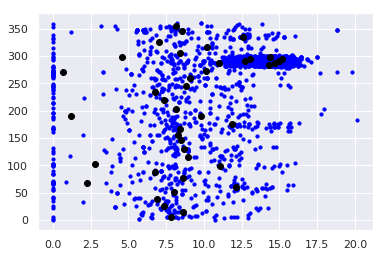

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import math
#https://www.quora.com/How-can-we-choose-a-good-K-for-K-means-clustering

k = round(math.sqrt(len(df1)/2))
k = 41

Y = np.column_stack((optimalmag, ra))
X = np.matrix(Y)

kmeans = KMeans(n_clusters=k).fit(X)

plt.scatter([X[:,0]] , [X[:,1]], color='blue', s = 10)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print('Centers: ' + str(len(kmeans.cluster_centers_)))

#Black are cluster centers and blue are the datapoints

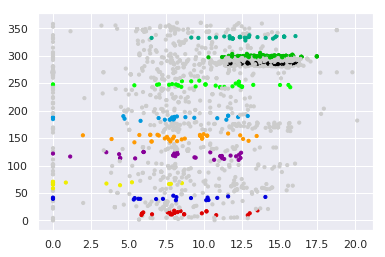

In [0]:
from matplotlib.pyplot import *
cluster = KMeans(41)
cluster.fit(X)
cluster.labels_
plt.scatter([X[:,0]],[X[:,1]], c=[plt.cm.nipy_spectral(float(i) /10) for i in cluster.labels_], s=10)
plt.show()


Centers: 41


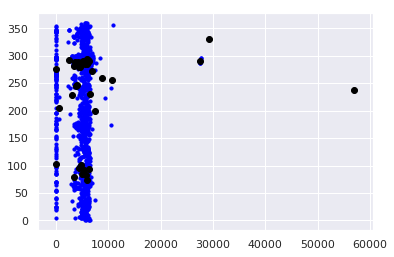

In [0]:
Y = np.column_stack((teff, ra))
X = np.matrix(Y)

kmeans = KMeans(n_clusters=k).fit(X)

plt.scatter([X[:,0]] , [X[:,1]], color='blue', s = 10)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print('Centers: ' + str(len(kmeans.cluster_centers_)))

#Black are cluster centers and blue are the datapoints

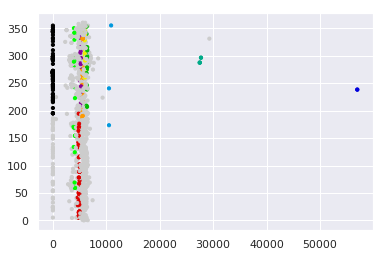

In [0]:
cluster = KMeans(41)
cluster.fit(X)
cluster.labels_
plt.scatter([X[:,0]],[X[:,1]], c=[plt.cm.nipy_spectral(float(i) /10) for i in cluster.labels_], s=10)
plt.show()

Centers: 41


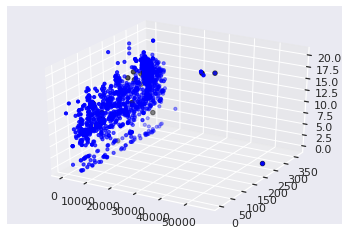

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Y = np.column_stack((teff, ra, optimalmag))
X = np.matrix(Y)

X = X.astype(float)

kmeans = KMeans(n_clusters=k).fit(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0] , X[:,1], X[:,2], color='blue', s = 10)
ax.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color='black')
print('Centers: ' + str(len(kmeans.cluster_centers_)))

#Black are cluster centers and blue are the datapoints

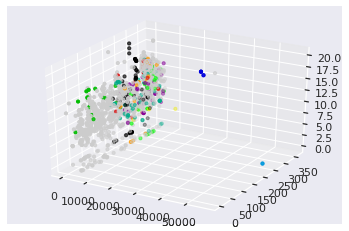

In [0]:
cluster = KMeans(41)
cluster.fit(X)
cluster.labels_
ax = fig.add_subplot(111, projection='3d')
ax.scatter([X[:,0]],[X[:,1]], [X[:,2]], c=[plt.cm.nipy_spectral(float(i) /10) for i in cluster.labels_], s=10)
ax.figure

In [0]:
def getScores(feat1, feat2):
  Y = np.column_stack((feat1, feat2))
  X = np.matrix(Y)
  kmeans = KMeans(n_clusters=k).fit(X)
  #print(cluster.labels_[target])
  i = 0
  while (i < len(df1['rowid']) - 1):
    if (cluster.labels_[i] == cluster.labels_[target]):
      scores[i] += 1
    i += 1
  #print(scores[target])
  

In [0]:
print(len(cluster.labels_))
print(cluster.labels_)

3373
[24  9  4 ... 32  4 31]


In [0]:
featlist = [orbper, teff, optimalmag, ra, dec, pnum, prad, srad, smass]

i = 0
j = i + 1
while (i < len(featlist)):
  while (j < len(featlist)):
    getScores(featlist[i], featlist[j])
    j += 1
  i += 1
  j = i + 1

In [0]:
high = max(scores)
while (i < len(scores)):
  if (scores[i] == high):
    print('Planet:', df1['pl_hostname'][i], '    Score:', high)
  i += 1
    
  
  


Planet: 81 Cet     Score: 36
Planet: BD+14 4559     Score: 36
Planet: BD-06 1339     Score: 36
Planet: BD-08 2823     Score: 36
Planet: HAT-P-11     Score: 36
Planet: HAT-P-2     Score: 36
Planet: HD 13931     Score: 36
Planet: HD 145377     Score: 36
Planet: HD 170469     Score: 36
Planet: HD 17156     Score: 36
Planet: HD 216437     Score: 36
Planet: HD 5891     Score: 36
Planet: HD 81040     Score: 36
Planet: HD 85390     Score: 36
Planet: HIP 79431     Score: 36
Planet: K2-15     Score: 36
Planet: K2-16     Score: 36
Planet: K2-34     Score: 36
Planet: K2-35     Score: 36
Planet: K2-4     Score: 36
Planet: K2-67     Score: 36
Planet: Kepler-1031     Score: 36
Planet: Kepler-1047     Score: 36
Planet: Kepler-1057     Score: 36
Planet: Kepler-1061     Score: 36
Planet: Kepler-1129     Score: 36
Planet: Kepler-113     Score: 36
Planet: Kepler-1139     Score: 36
Planet: Kepler-114     Score: 36
Planet: Kepler-114     Score: 36
Planet: Kepler-1145     Score: 36
Planet: Kepler-115     Sc